![image](images/how.png)

#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/t/997162b5cae941f08ac3d3e6ebab504e

In [447]:
import pandas as pd
import numpy as np
from sklearn import linear_model
# la otra forma, pero con mismo resultado: from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')
from sklearn import model_selection

In [ ]:
impo

In [448]:
### para que funcione necesitas bajarte los archivos de datos de Kaggle :) 
df = pd.read_csv("C:\\Users\\javig\\OneDrive\\Documents\\Bootcamp\\The_Bridge_Javier\\BootCamp_JGAF\\kaggle_com\\hospital_data\\train_set.csv")

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  int64  
 1   1       100000 non-null  int64  
 2   2       100000 non-null  object 
 3   3       100000 non-null  int64  
 4   4       100000 non-null  object 
 5   5       100000 non-null  int64  
 6   6       100000 non-null  object 
 7   7       100000 non-null  object 
 8   8       100000 non-null  object 
 9   9       99967 non-null   float64
 10  10      100000 non-null  int64  
 11  11      98517 non-null   float64
 12  12      100000 non-null  object 
 13  13      100000 non-null  object 
 14  14      100000 non-null  int64  
 15  15      100000 non-null  object 
 16  16      100000 non-null  float64
 17  17      100000 non-null  object 
dtypes: float64(3), int64(6), object(9)
memory usage: 13.7+ MB


In [450]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
1,159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
2,309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
3,279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
4,147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60


<AxesSubplot:>

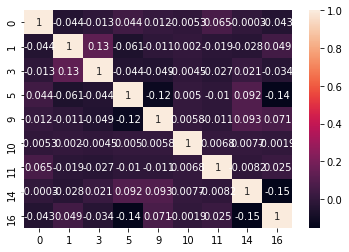

In [451]:
sns.heatmap(df.corr(),  annot = True)

In [452]:
# quitad la primera columna porque corresponde con el case_id y por tanto no le servirá al modelo para aprender...
# quitar otras columnas es decisión vuestra como futuros data scientists 
df['9'] = df['9'].fillna(df['9'].median())
df['9'].isna().sum()
df['11'] = df['11'].fillna(df['11'].median())

In [453]:
le = preprocessing.LabelEncoder()


In [454]:

le = preprocessing.LabelEncoder()
le.fit(df['2'])
df['2']= le.transform(df['2'])
le.fit(df['6'])
df['6']= le.transform(df['6'])
le.fit(df['8'])
df['8']= le.transform(df['8'])
le.fit(df['12'])
df['12']= le.transform(df['12'])
le.fit(df['13'])
df['13']= le.transform(df['13'])
df['13'] = df['13']*2
le.fit(df['15'])
df['15']= le.transform(df['15'])
df['15'] = df['15']*2
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528,6,0,6,X,2,2,R,5,4.0,45810,2.0,2,4,2,4,2817.0,0-10
1,159472,23,0,6,X,4,2,Q,5,2.0,128565,15.0,1,4,4,10,4498.0,21-30
2,309765,2,2,5,Z,2,1,S,5,3.0,46565,5.0,2,4,2,14,4573.0,11-20
3,279614,32,5,9,Y,3,2,S,1,4.0,124546,6.0,0,4,4,2,7202.0,51-60
4,147791,14,0,1,X,3,2,S,4,2.0,22729,8.0,2,4,2,10,3398.0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,237869,12,0,9,Y,3,2,R,1,3.0,82914,3.0,0,4,6,10,3966.0,More than 100 Days
99996,254763,28,1,11,X,2,2,R,5,2.0,40026,5.0,2,4,3,4,4005.0,51-60
99997,69788,6,0,6,X,3,2,Q,5,3.0,92346,2.0,1,2,2,6,5215.0,31-40
99998,204442,32,5,9,Y,2,2,S,1,4.0,113798,15.0,1,4,3,8,5092.0,11-20


In [455]:
df.corr()

,0,1,2,3,5,6,8,9,10,11,12,13,14,15,16
0,1.000000,-0.044017,-0.003917,-0.012569,0.044390,-0.001795,-0.011592,0.012156,-0.005268,0.065547,0.072884,0.009305,-0.000304,-0.113245,-0.043202
1,-0.044017,1.000000,0.035173,0.128066,-0.060985,0.003113,-0.130029,-0.011090,0.002042,-0.019263,-0.014986,-0.009927,-0.028417,0.018930,0.049095
2,-0.003917,0.035173,1.000000,-0.009057,-0.100789,-0.001518,-0.261211,0.016297,-0.005673,0.056522,0.081733,-0.006573,-0.046848,0.008463,0.020694
3,-0.012569,0.128066,-0.009057,1.000000,-0.043746,0.025421,-0.093437,-0.048520,-0.004483,-0.027489,-0.011756,0.002567,0.021327,0.022547,-0.033820
5,0.044390,-0.060985,-0.100789,-0.043746,1.000000,0.048221,0.050064,-0.118282,0.005043,-0.010145,-0.019724,0.013587,0.091744,-0.140317,-0.141999
6,-0.001795,0.003113,-0.001518,0.025421,0.048221,1.000000,-0.039449,-0.098089,0.003809,0.019255,-0.082302,-0.003973,0.025482,0.035652,-0.080486
8,-0.011592,-0.130029,-0.261211,-0.093437,0.050064,-0.039449,1.000000,0.078366,0.001780,-0.140949,0.041169,0.013443,0.022007,0.001289,-0.020504
9,0.012156,-0.011090,0.016297,-0.048520,-0.118282,-0.098089,0.078366,1.000000,0.005739,-0.010337,0.131355,0.047828,0.093010,0.001479,0.071103
10,-0.005268,0.002042,-0.005673,-0.004483,0.005043,0.003809,0.001780,0.005739,1.000000,0.006709,0.004400,0.000164,0.007707,0.001132,-0.001891
11,0.065547,-0.019263,0.056522,-0.027489,-0.010145,0.019255,-0.140949,-0.010337,0.006709,1.000000,-0.030696,-0.010698,-0.007838,-0.021376,0.025116


#### 1. Definir X e y

In [456]:
# coger las columnas 1, 3, 5, 9 tiene solo valor ilustrativo, NO LO COPIÉIS
X = np.array(df[['1',"2",'6',"9","12","13", "15"]])
y = np.array(df['17'])
X.shape

(100000, 7)

In [457]:
y.shape

(100000,)

#### 2. Dividir X_train, X_test, y_train, y_test

In [458]:
test_size= 0.25
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [459]:
X_train

array([[12.,  0.,  3., ...,  0.,  0., 10.],
       [ 1.,  3.,  2., ...,  0.,  4., 10.],
       [27.,  0.,  2., ...,  1.,  4.,  8.],
       ...,
       [29.,  0.,  2., ...,  2.,  0., 10.],
       [ 3.,  2.,  2., ...,  1.,  4.,  6.],
       [ 9.,  3.,  2., ...,  1.,  0., 16.]])

#### 3. Asignar el modelo (vacío) a una variable
Aquí meteríais los parámetros

In [460]:
model = linear_model.LogisticRegression()
# la otra forma, pero lo mismo: model = LogisticRegression()

#### 4. Entrenar el modelo con X_train, y_train

In [461]:
model.fit(X_train, y_train)

LogisticRegression()

In [462]:
name='Kaggle comp'
kfold = model_selection.KFold(n_splits=25, shuffle=True, random_state=seed) 
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Kaggle comp: 0.294293 (0.008514)


#### 5. Predecir con el modelo ya entrenado con X_test

In [463]:
predictions = model.predict(X_test)
print(predictions)

['21-30' '21-30' '21-30' ... '11-20' '21-30' '21-30']


#### 6. Sacar métricas, valorar el modelo 

In [464]:
model.score(X_test,y_test)

0.29608

## Una vez listo el modelo, toca predecir con el dataset de predicción 

In [465]:
to_pred = pd.read_csv("C:\\Users\\javig\\OneDrive\\Documents\\Bootcamp\\The_Bridge_Javier\\BootCamp_JGAF\\kaggle_com\\hospital_data\\test_set.csv")

In [466]:
# la primera columna es id_case, deberéis quitarla para hacer la predicción si la habéis quitado para entrenar
# pero guardarla para incluirla en la submission

# IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO
# SI EL ARRAY CON EL QUE HICISTEIS .fit() ERA DE 4 COLUMNAS, PARA .predict() DEBEN SER LAS MISMAS
# SI AL ARRAY CON EL QUE HICISTEIS .fit() LO NORMALIZASTEIS, PARA .predict() DEBÉIS NORMALIZARLO
# TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 133744 FILAS
# SI O SI

to_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
1,208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0
2,305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0
3,266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0
4,13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,318155,18,d,13,Y,6,anesthesia,Q,B,3.0,123269,25.0,Urgent,Minor,4,51-60,5089.0
133740,144850,27,a,7,Y,2,gynecology,S,C,2.0,1293,8.0,Emergency,Moderate,3,61-70,6713.0
133741,180676,16,c,3,Z,3,gynecology,R,A,3.0,112921,5.0,Trauma,Minor,3,31-40,5326.0
133742,39933,28,b,11,X,4,gynecology,R,F,2.0,585,2.0,Trauma,Extreme,2,31-40,7072.0


In [467]:
# para evitar este error ValueError: Input contains NaN, infinity or a value too large for dtype('float64)
to_pred['9'] = to_pred['9'].fillna(to_pred['9'].median())
to_pred['9'].isna().sum()

0

In [468]:

le = preprocessing.LabelEncoder()
le.fit(to_pred['2'])
to_pred['2']= le.transform(to_pred['2'])
le.fit(to_pred['6'])
to_pred['6']= le.transform(to_pred['6'])
le.fit(to_pred['8'])
to_pred['8']= le.transform(to_pred['8'])
le.fit(to_pred['12'])
to_pred['12']= le.transform(to_pred['12'])
le.fit(to_pred['13'])
to_pred['13']= le.transform(to_pred['13'])
le.fit(to_pred['15'])
to_pred['15']= le.transform(to_pred['15'])
to_pred


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,314114,19,0,7,Y,4,2,S,2,2.0,59278,8.0,0,1,2,4,4778.0
1,208989,15,2,5,Z,3,2,S,5,2.0,102253,15.0,1,2,3,3,5734.0
2,305872,17,4,1,X,4,2,R,4,4.0,5828,4.0,0,1,3,7,5064.0
3,266099,3,2,3,Z,4,0,R,0,2.0,56642,9.0,2,0,4,3,3254.0
4,13228,6,0,6,X,4,2,R,5,1.0,116266,8.0,0,1,3,2,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,318155,18,3,13,Y,6,1,Q,1,3.0,123269,25.0,2,1,4,5,5089.0
133740,144850,27,0,7,Y,2,2,S,2,2.0,1293,8.0,0,2,3,6,6713.0
133741,180676,16,2,3,Z,3,2,R,0,3.0,112921,5.0,1,1,3,3,5326.0
133742,39933,28,1,11,X,4,2,R,5,2.0,585,2.0,1,0,2,3,7072.0


In [469]:
predictions_submit = model.predict(to_pred[['1',"2",'6',"9","12","13", "15"]])


In [470]:
submission = pd.DataFrame({"id": to_pred["0"], "days": predictions_submit})
submission

,id,days
0,314114,11-20
1,208989,21-30
2,305872,11-20
3,266099,21-30
4,13228,21-30
...,...,...
133739,318155,21-30
133740,144850,21-30
133741,180676,11-20
133742,39933,21-30


In [471]:
sample = pd.read_csv("C:\\Users\\javig\\OneDrive\\Documents\\Bootcamp\\The_Bridge_Javier\\BootCamp_JGAF\\kaggle_com\\hospital_data\\sample_submission.csv")

In [472]:
sample.shape

(133744, 2)

In [473]:
if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission.to_csv("to_submit.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

you're ready to submit!
